# check whether all the packages are installed

In [1]:
rm(list = ls())

ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg))
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}

# the packages you need for this task
packages <- c('tidyverse', 'fpp2', 'readr', 'dplyr', 'xts', 'ggplot2','astsa', 'Hmisc', 'tseries','aTSA','FitAR')

ipak(packages)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: fpp2

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ forecast  8.15     ✔ expsmooth 2.3 
✔ fma       2.4      



Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last


Loading required packag

tidyverse      fpp2     readr     dplyr       xts   ggplot2     astsa     Hmisc 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 
  tseries      aTSA     FitAR 
     TRUE      TRUE      TRUE

# load all packages into R

In [2]:
library(tidyverse)
library(fpp2)
library(readr)
library(dplyr)
library(astsa)
library(xts)
library(ggplot2)
library(Hmisc)
library(aTSA)
library(lmtest)
library(FitAR)

# change your working directory

In [3]:
setwd("/Users/ning/Documents/Working_Directory/Tex_MD/Teaching/tutorial/6003/W6")

# load data into R

In [4]:
data <- read_csv("AUQuGDP.csv")
data <- na.omit(data)

Rows: 241 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Time, t
dbl (3): AuGDP, quarter, year


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# check the summary statistics

In [5]:
describe(data)

data 

 5  Variables      241  Observations
--------------------------------------------------------------------------------
Time 
       n  missing distinct 
     241        0      241 

lowest : 01apr1960 01apr1961 01apr1962 01apr1963 01apr1964
highest: 01oct2015 01oct2016 01oct2017 01oct2018 01oct2019
--------------------------------------------------------------------------------
AuGDP 
        n   missing  distinct      Info      Mean       Gmd       .05       .10 
      241         0       241         1 2.265e+11 1.386e+11 7.191e+10 8.291e+10 
      .25       .50       .75       .90       .95 
1.242e+11 1.983e+11 3.256e+11 4.196e+11 4.504e+11 

lowest : 6.46830e+10 6.54860e+10 6.59580e+10 6.62320e+10 6.64730e+10
highest: 4.72267e+11 4.75156e+11 4.77791e+11 4.78811e+11 4.80280e+11
--------------------------------------------------------------------------------
quarter 
       n  missing distinct     Info     Mean      Gmd 
     241        0        4    0.938    2.494    1.257 
   

# write the plot function for the time series : ACF, PACF, histogram and ADF test

In [28]:
plot_tsf <- function(data) {
  
  adf.test(data, nlag=3)
  
  par(mfrow=c(2,2))

  plot(data, type="l", main="line plot")
  
  acf(data, lag.max = 20, main="ACF")
  
  pacf(data, lag.max = 20, main="PACF")

  hist(data, main="histogram")
  
}

# check the plot and ADF for AuGDP

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 17.33    0.99
[2,]   1 10.99    0.99
[3,]   2  8.07    0.99
Type 2: with drift no trend 
     lag  ADF p.value
[1,]   0 6.10    0.99
[2,]   1 5.61    0.99
[3,]   2 4.81    0.99
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -0.346   0.988
[2,]   1 -0.426   0.985
[3,]   2 -0.446   0.984
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


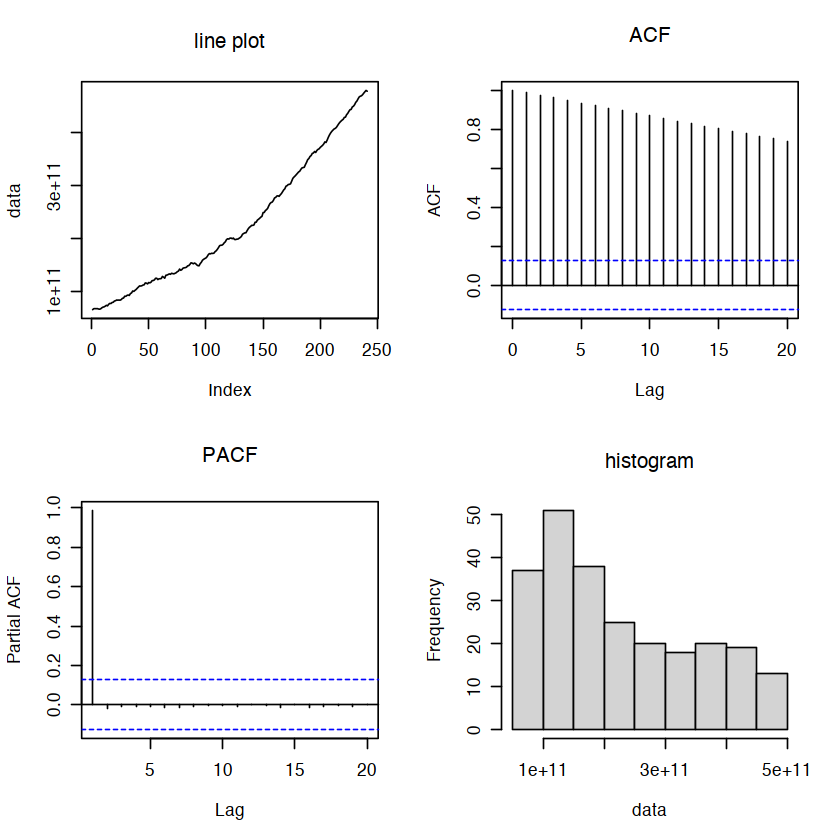

In [29]:
plot_tsf(data$AuGDP)

# check the plot and ADF for the 1st order difference of AuGDP

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -8.01    0.01
[2,]   1 -4.64    0.01
[3,]   2 -3.28    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -13.17    0.01
[2,]   1  -8.36    0.01
[3,]   2  -6.34    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -15.26    0.01
[2,]   1 -10.16    0.01
[3,]   2  -7.95    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


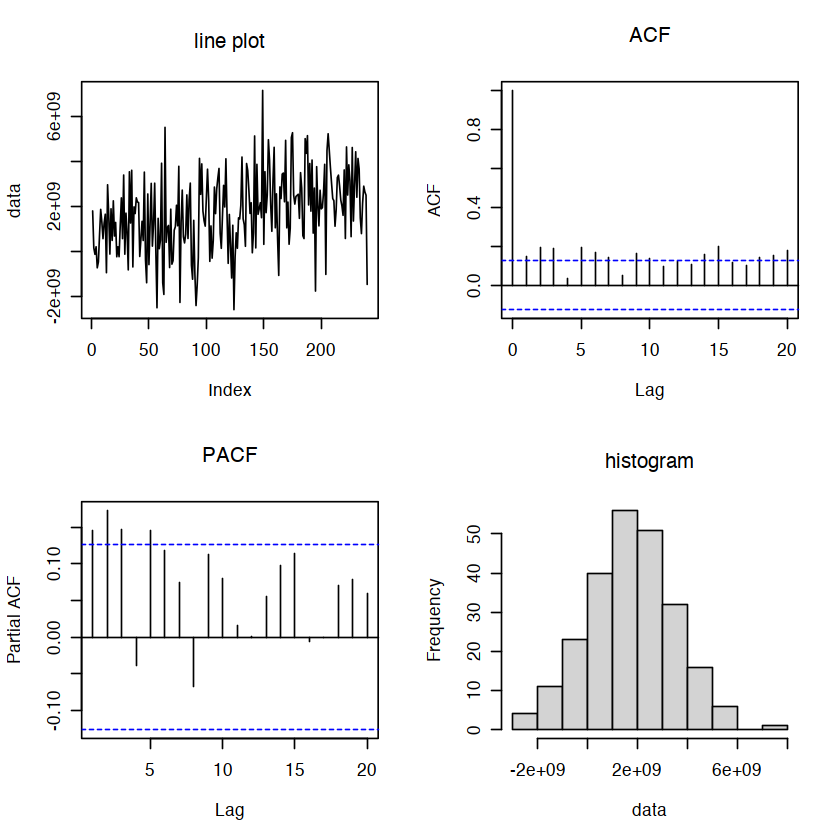

In [31]:
data$AuGDP_D1 = data$AuGDP - Lag(data$AuGDP, 1)
plot_tsf(data$AuGDP_D1[2:length(data$AuGDP_D1)])

# check the plot and ADF for the 2nd order difference for AuGDP

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -27.5    0.01
[2,]   1 -19.1    0.01
[3,]   2 -13.2    0.01
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -27.4    0.01
[2,]   1 -19.0    0.01
[3,]   2 -13.2    0.01
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -27.3    0.01
[2,]   1 -19.0    0.01
[3,]   2 -13.2    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


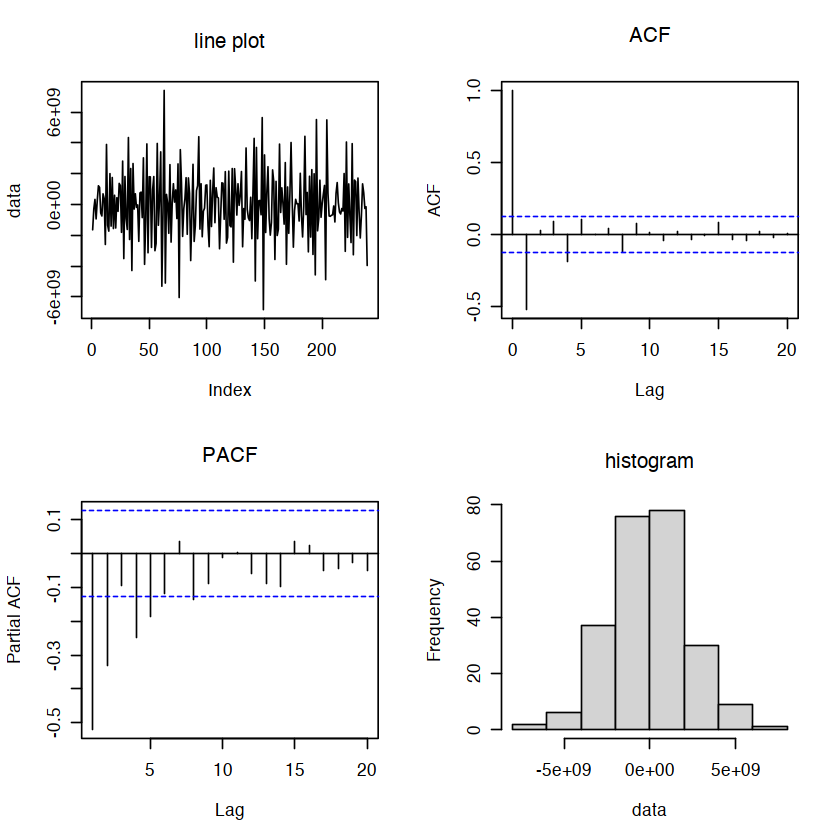

In [32]:
data$AuGDP_D2 = data$AuGDP_D1 - Lag(data$AuGDP_D1, 1)
plot_tsf(data$AuGDP_D2[3:length(data$AuGDP_D1)])

# optimal ARIMA model searching

## first, let's set up the ARIMA based on the ACF and PACF
## the model you choose as such will inevitibly be hilarious; however, let's start from the funny one

---

# firstly, set up the time series

In [43]:
GDP = ts(data$AuGDP, start = 1960,end = 2020, frequency = 4)

GDP_2018 = window(GDP, start = 1960, end = c(2018,4))

GDP_2018

,Qtr1,Qtr2,Qtr3,Qtr4
1960,6.46830e+10,6.64730e+10,6.66230e+10,6.64900e+10
1961,6.66900e+10,6.59580e+10,6.54860e+10,6.62320e+10
1962,6.80910e+10,6.93950e+10,6.99570e+10,7.12130e+10
1963,7.28570e+10,7.19080e+10,7.48590e+10,7.64630e+10
1964,7.63410e+10,7.82250e+10,7.87100e+10,8.09480e+10
1965,8.16270e+10,8.29070e+10,8.26650e+10,8.28650e+10
1966,8.26260e+10,8.37580e+10,8.61260e+10,8.66900e+10
1967,9.00730e+10,8.99460e+10,9.16370e+10,9.24320e+10
1968,9.16090e+10,9.51360e+10,9.63930e+10,9.99870e+10
1969,9.92940e+10,1.01262e+11,1.02937e+11,1.05309e+11


# based on the graph, let's set $p=q=7$ and $d=2$

In [69]:
fit <- Arima(GDP_2018, order=c(7,2,7))
summary(fit)

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: GDP_2018 
ARIMA(7,2,7) 

Coefficients:
          ar1      ar2     ar3     ar4     ar5     ar6      ar7      ma1
      -0.6634  -0.3011  0.1727  0.8858  0.4663  0.1626  -0.0861  -0.2836
s.e.   0.3798      NaN  0.0797  0.0921  0.3719     NaN   0.0711   0.3773
         ma2      ma3      ma4     ma5     ma6     ma7
      -0.272  -0.4214  -0.9807  0.4289  0.2667  0.2899
s.e.     NaN      NaN   0.0767  0.3894     NaN     NaN

sigma^2 estimated as 2.516e+18:  log likelihood=-5286.36
AIC=10602.73   AICc=10604.93   BIC=10654.56

Training set error measures:
                    ME       RMSE        MAE        MPE      MAPE      MASE
Training set 103475536 1531390279 1206261739 0.06260491 0.7118683 0.1688822
                     ACF1
Training set -0.005780713

In [70]:
fit$bic

[1] 10654.56

In [71]:
fit$aicc

[1] 10604.93

# apparently, making choice based on ACF and PACF is naive. You got many NaN in the return, suggesting that your model has problem

In [72]:
coeftest(fit)

Warning message in sqrt(diag(se)):
“NaNs produced”



z test of coefficients:

     Estimate Std. Error  z value Pr(>|z|)    
ar1 -0.663435   0.379766  -1.7470  0.08065 .  
ar2 -0.301146        NaN      NaN      NaN    
ar3  0.172672   0.079653   2.1678  0.03017 *  
ar4  0.885751   0.092094   9.6179  < 2e-16 ***
ar5  0.466275   0.371854   1.2539  0.20987    
ar6  0.162601        NaN      NaN      NaN    
ar7 -0.086063   0.071126  -1.2100  0.22627    
ma1 -0.283567   0.377323  -0.7515  0.45234    
ma2 -0.272041        NaN      NaN      NaN    
ma3 -0.421421        NaN      NaN      NaN    
ma4 -0.980725   0.076700 -12.7866  < 2e-16 ***
ma5  0.428916   0.389407   1.1015  0.27070    
ma6  0.266666        NaN      NaN      NaN    
ma7  0.289878        NaN      NaN      NaN    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# 95% confidence interval : you got so many NaN

In [73]:
confint(fit)

Warning message in sqrt(diag(vcov(object))):
“NaNs produced”


,2.5 %,97.5 %
ar1,-1.40776330,0.08089336
ar2,NaN,NaN
ar3,0.01655587,0.32878893
ar4,0.70524922,1.06625241
ar5,-0.26254511,1.19509495
ar6,NaN,NaN
ar7,-0.22546696,0.05334096
ma1,-1.02310708,0.45597265
ma2,NaN,NaN
ma3,NaN,NaN



	Ljung-Box test

data:  Residuals from ARIMA(7,2,7)
Q* = 5.7388, df = 3, p-value = 0.125

Model df: 14.   Total lags used: 17



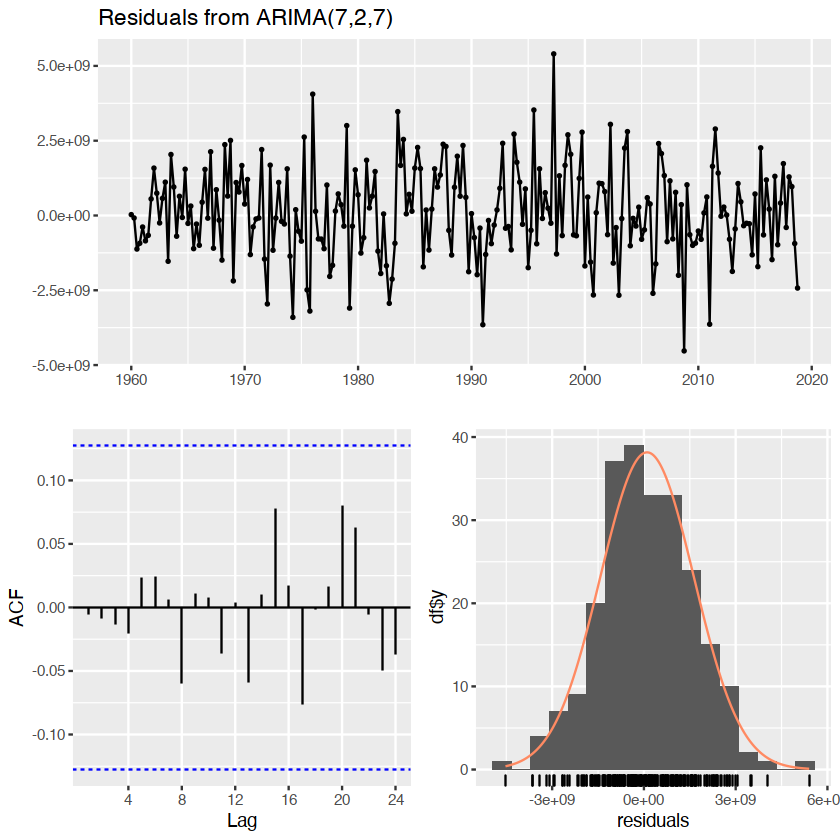

In [74]:
checkresiduals(fit)

# the roots is too close to the unit circle, which confirms the issue

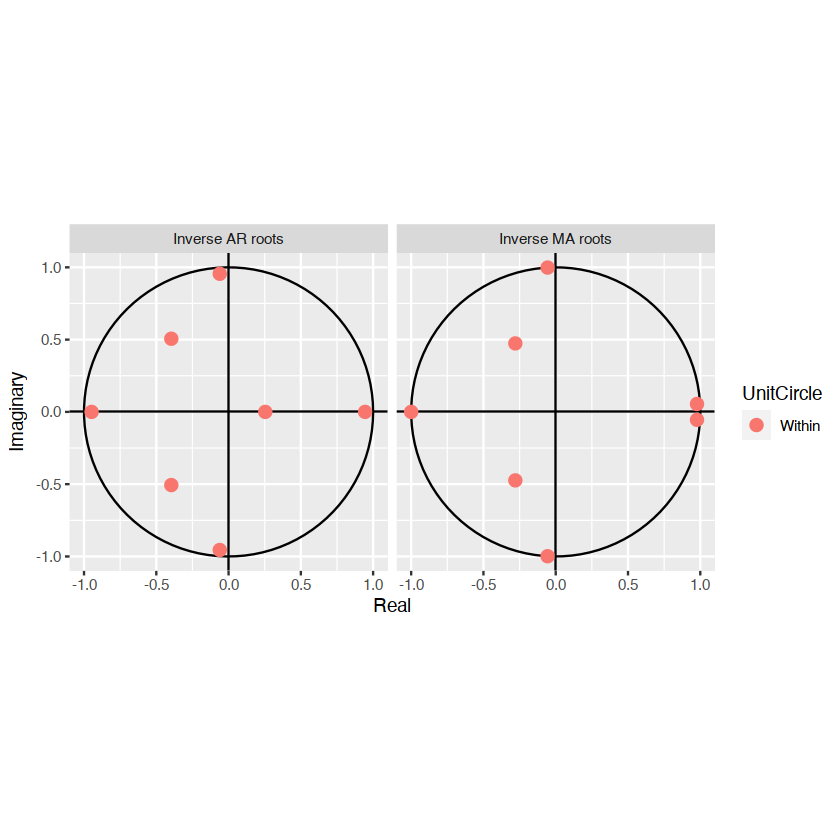

In [75]:
autoplot(fit)

In [76]:
predict(fit,n.ahead = 4)

,Qtr1,Qtr2,Qtr3,Qtr4
2019,472356319716,474469414500,476994949221,480256317651
,Qtr1,Qtr2,Qtr3,Qtr4
2019,1594722490,2311062748,2953645099,3570787433


# now let's use the function "auto.arima" to choose the value of p,q and d automatically based on BIC and AICc

In [60]:
fit_opt <- auto.arima(GDP_2018)

In [61]:
summary(fit_opt)

Series: GDP_2018 
ARIMA(0,2,1)(0,0,2)[4] 

Coefficients:
          ma1     sma1     sma2
      -0.9175  -0.2172  -0.1413
s.e.   0.0282   0.0684   0.0654

sigma^2 estimated as 2.509e+18:  log likelihood=-5288.8
AIC=10585.6   AICc=10585.77   BIC=10599.42

Training set error measures:
                    ME       RMSE        MAE        MPE      MAPE      MASE
Training set 155420662 1567231173 1231943587 0.07990213 0.7213064 0.1724778
                   ACF1
Training set -0.0546522

# much better BIC and AICc

In [62]:
fit_opt$bic

[1] 10599.42

In [63]:
fit_opt$aicc

[1] 10585.77

# no NaN any more in test and confidence interval

In [64]:
coeftest(fit_opt)


z test of coefficients:

      Estimate Std. Error  z value  Pr(>|z|)    
ma1  -0.917472   0.028194 -32.5411 < 2.2e-16 ***
sma1 -0.217229   0.068368  -3.1773  0.001486 ** 
sma2 -0.141292   0.065367  -2.1615  0.030656 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [65]:
confint(fit_opt)

,2.5 %,97.5 %
ma1,-0.9727321,-0.86221264
sma1,-0.3512292,-0.08322971
sma2,-0.2694094,-0.01317419


# Ljung and Box are both happy


	Ljung-Box test

data:  Residuals from ARIMA(0,2,1)(0,0,2)[4]
Q* = 1.1054, df = 5, p-value = 0.9536

Model df: 3.   Total lags used: 8



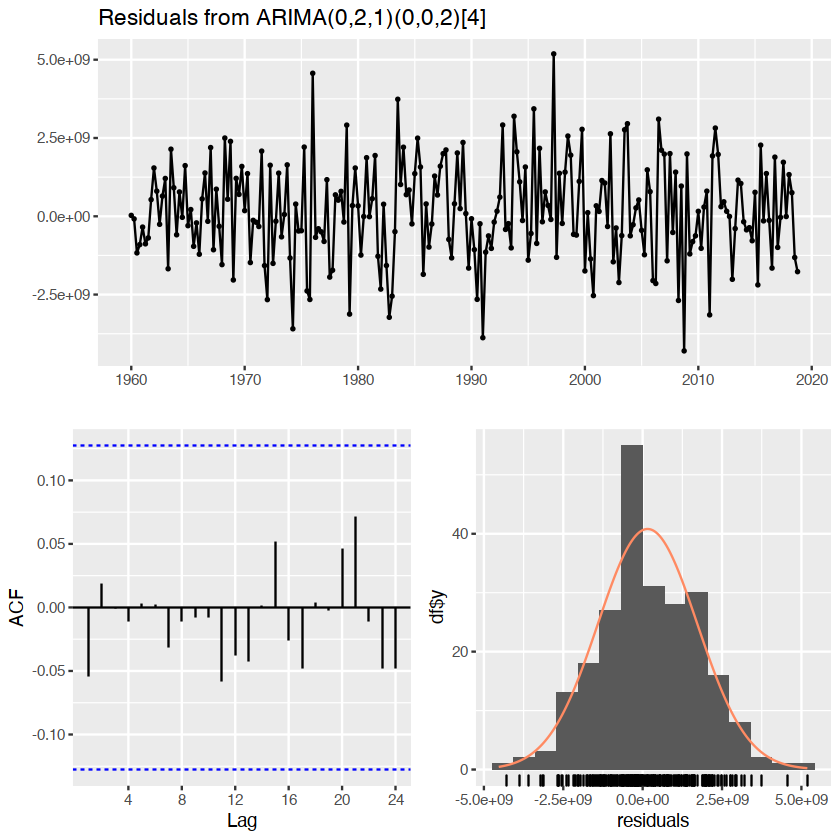

In [66]:
checkresiduals(fit_opt)

# the roots are also farther away from the unit cirlce

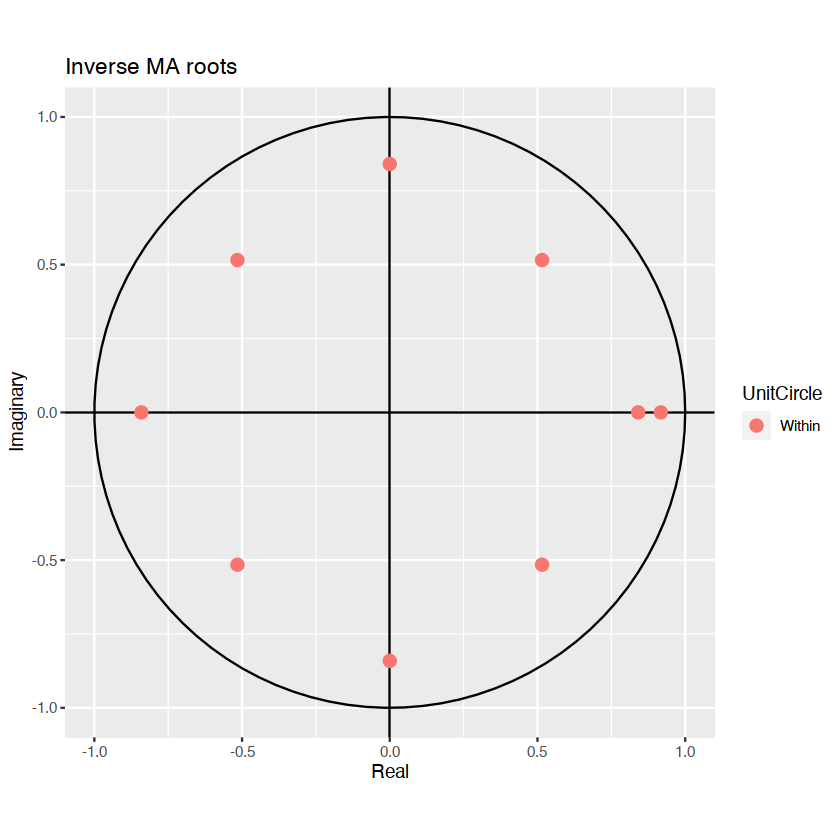

In [67]:
autoplot(fit_opt)

In [68]:
predict(fit_opt, n.ahead = 4)

,Qtr1,Qtr2,Qtr3,Qtr4
2019,472643424803,475124405787,477793124491,480808630188
,Qtr1,Qtr2,Qtr3,Qtr4
2019,1584101747,2334530700,2975928009,3572380425
